<b><center><font size="6">Quicken Loans - Rocket Mortgage</center></font></b>
<center><font size="6">Case Study</center></font><br>

## Name: Anusha Manjunatha
Date: 08/18/2021

## Problem Statement:

Study and explore the given data of direct marketing campaigns (phone calls) of a European banking institution. 
Goal is to evaluate the current model and then to determine the model that can increase the success rate of telemarketing for the bank.

## Loading library packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, plot_roc_curve, accuracy_score, log_loss, precision_score, \
recall_score, f1_score, precision_recall_curve, auc, classification_report, accuracy_score, plot_confusion_matrix, \
ConfusionMatrixDisplay

from mlxtend.evaluate import lift_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## Import Dataset and data pre-processing:

In [2]:
# Reading the Dataset and displaying the first 5 rows
df = pd.read_csv("DSA Data Set.csv")
df.head()
df.shape

(41188, 22)

## Examining the features present in the data:

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'y'],
      dtype='object')

In [4]:
#number of rows, number of columns
df.shape

(41188, 22)

In [5]:
#List datatypes of every column in the dataset
df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
ModelPrediction    float64
y                   object
dtype: object

## Exploratory Data Analysis (EDA):

Explore the data to:
1. Find Missing Values
2. Find Unwanted Columns
3. Explore the Categorical Features
4. Explore the Numerical Features
5. Find Outliers in numerical features
6. Find the Correlation between numerical features
7. Explorer the target feature
Check the Data set is balanced or not based on target values in classification

## Check for Duplicate records:

In [6]:
duplicate = df.duplicated()
df[duplicate]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0.945200,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0.956465,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.956728,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.961048,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0.955202,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0.970002,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0.956788,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0.932301,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0.842341,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.827244,no


In [7]:
df.duplicated().sum()
# total 12 duplicated rows to be deleted

12

In [8]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()
# Deleted all 12

0

## Check for Missing values:

In [9]:
# To Check if there are any null values
df.isnull().sum()
# there are no missing values

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

## Exploring all the features:

In [10]:
#Looping through all the features in the dataset to list their unique values 
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('------'*20)

#df.nunique() -- list the count of unique values

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------------------------------------------------------------------------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------------------------------------------------------------------------------------------------
marital
['married' 'single' 'divorced' 'unknown']
------------------------------------------------------------------------------------------------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
-----------------------------------------------------------------

### Inference: 
1) There are many records listed with "UNKNOWN" values in the data. This counts as missing values. For now, we can replace it with nan to see the count. <br>
2) Since 'unknown' are in the categorical feature, we can treat by imputing them with the mode of the respective features

In [11]:
df.replace("unknown", np.nan).isnull().sum()

# Making a list of missing value types
# could loop through the possible missing_values = ["n/a", "na", "--", "unknown", " "]
# df = pd.read_csv("DSA Data Set.csv.csv", na_values = missing_values)

age                   0
job                 330
marital              80
education          1730
default            8596
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
ModelPrediction       0
y                     0
dtype: int64

### Inference: 
Features with Unknown values: job, marital, education, default, housing and loan, around 12.7K rows.

## Explore Categorical features:

In [12]:
# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

### Inference:
No numerical features are incorrectly listed as categorical feature

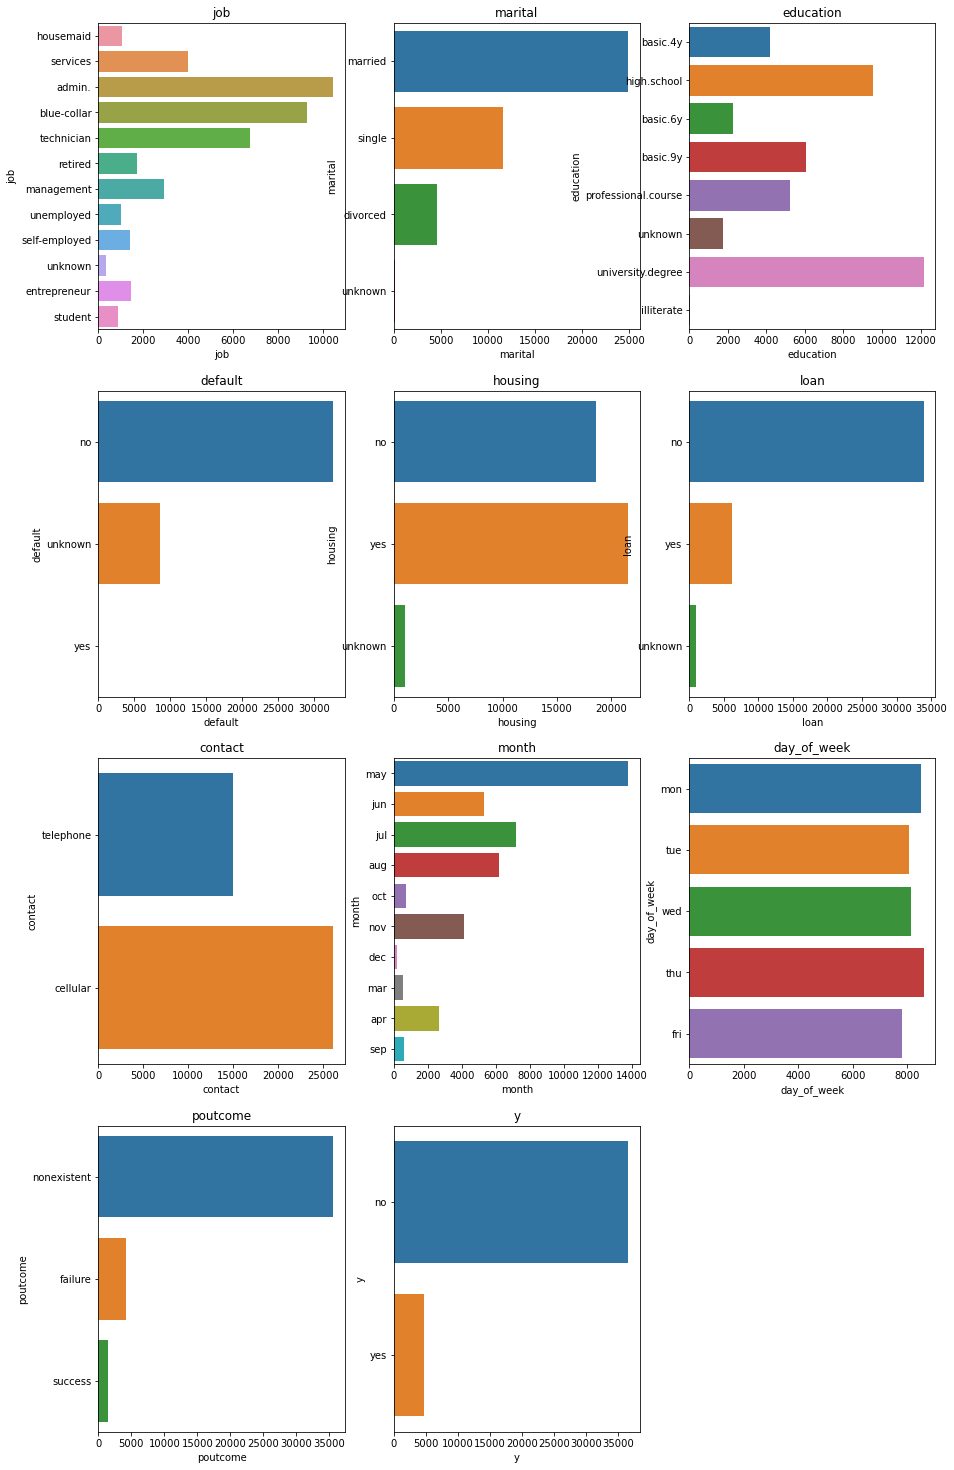

In [13]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Inference:

From the above distribution plots, we can understand who consitute more in the dataset:

* Job category: Admin are highest and housemaid are very less
* Marital status: Married customers are more in the dataset when compared to divorced
* Education: Many customers hold university degree
* Default: Seems no much infulence
* Loan: Many customers have housing loans and very few have personal loan.
* Contact: Most of customers are contacted through cellular mode when compared to telephone
* Month: Peak campaigns are carried out from the month of May to November
* day of the week: All of the days have in and around same count of contacts
* poutcome: we can see more of failures when compared to success from the previous campaigns


## Bivariate analysis

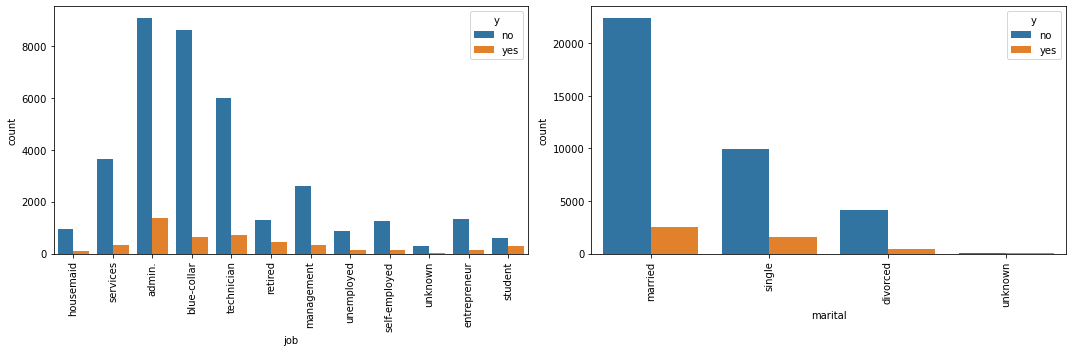

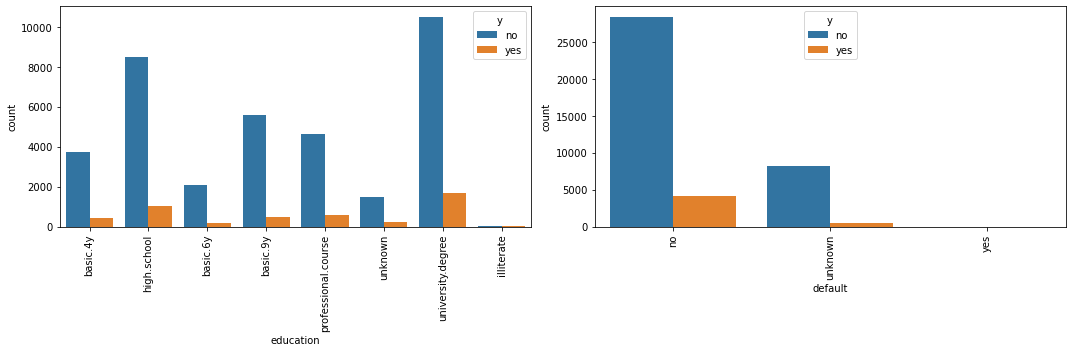

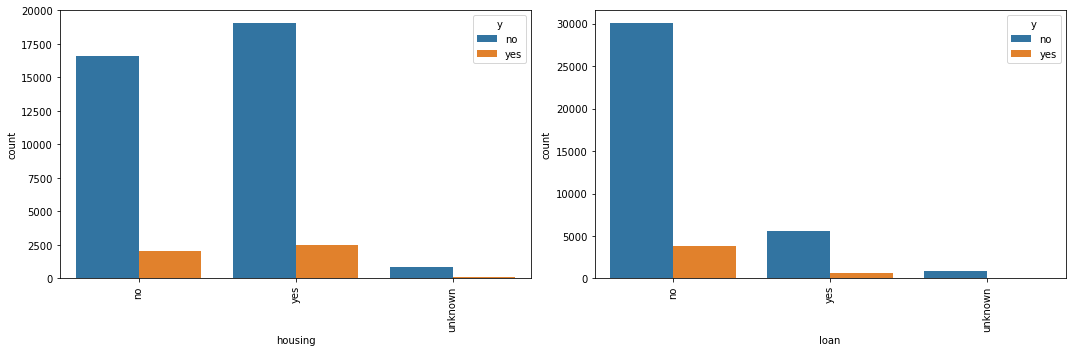

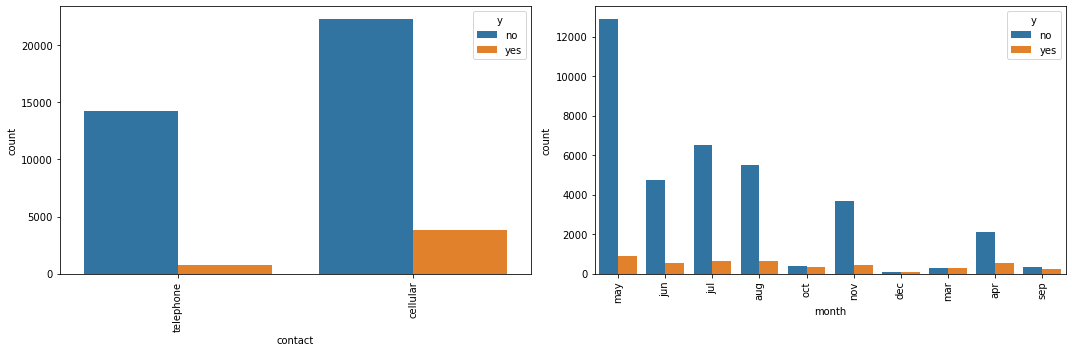

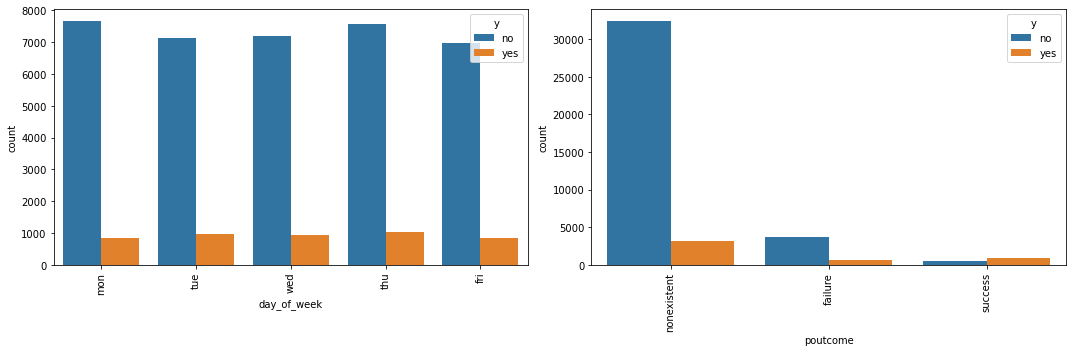

In [14]:
#Explore target variable = 'y' over categorical features
for i in range(0,len(categorical_features),2):
    if len(categorical_features) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=df[categorical_features[i]],hue=df['y'],data=df)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(df[categorical_features[i+1]],hue=df['y'],data=df)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


### Inference: 
* Customers with management jobs have more interest in term deposit
* Married customers are good targets 
* In month of September, October, December and march have peak success rates in customers subscribing to term deposit
* In month of may, records are high but client interst ratio is very less
* Customers who has personal loan seems to be not interested much on deposit while customers with housing loan seems to have some interest in term deposit

## Explore Numerical features:

In [15]:
# numerical features
numerical_features = df.select_dtypes(exclude=['object']).columns
numerical_features

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'ModelPrediction'],
      dtype='object')

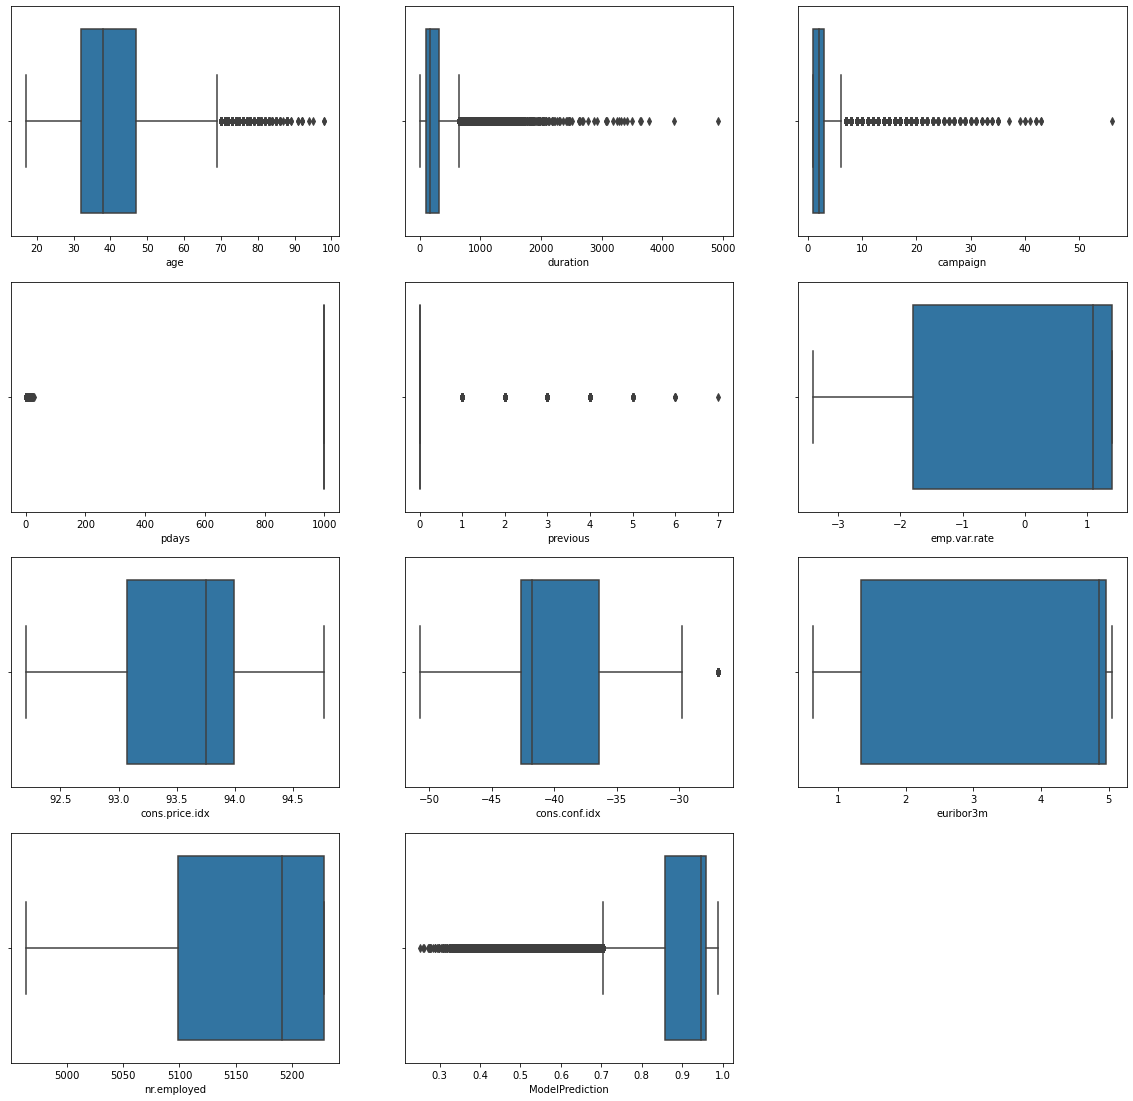

In [16]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

### Inference:

1) Features with outliers: Age, campaign, pdays, previous <br>
2) Features that can be ignored with outliers: duration, modelPrediction as they will be dropped from the model



## Age feature:

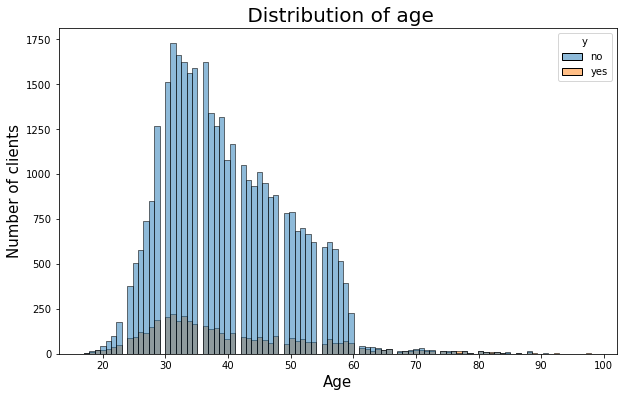

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", hue = "y")
plt.title(" Distribution of age", fontsize=20)
plt.ylabel('Number of clients', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.show()

In [18]:
df[df['age']> 70]
#Outliers:

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
27757,76,retired,married,university.degree,no,no,yes,cellular,mar,thu,...,999,0,nonexistent,-1.8,92.843,-50.0,1.757,5099.1,0.837756,no
27780,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,999,1,failure,-1.8,92.843,-50.0,1.687,5099.1,0.837684,no
27800,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,0.806142,no
27802,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,0.807809,yes
27805,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,999,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,0.826322,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,84,retired,divorced,basic.4y,unknown,yes,yes,cellular,oct,mon,...,3,1,success,-1.1,94.601,-49.5,1.000,4963.6,0.512290,no
40996,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,999,2,failure,-1.1,94.601,-49.5,1.016,4963.6,0.583917,yes
41004,80,retired,married,professional.course,no,yes,no,cellular,oct,thu,...,999,1,failure,-1.1,94.601,-49.5,1.025,4963.6,0.613988,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.567417,yes


### Inference:
1) From the previous boxplot and from the above distribution plot of age, we can see outliers present beyond age 60 with very few subscribers. Since only 421 rows, we can drop the outliers. <br>
2) 20 - 50 with subscription as yes have normal distribution

## Target feature ('y') analysis:
    
 y - has the client subscribed a term deposit? (binary: 'yes','no')

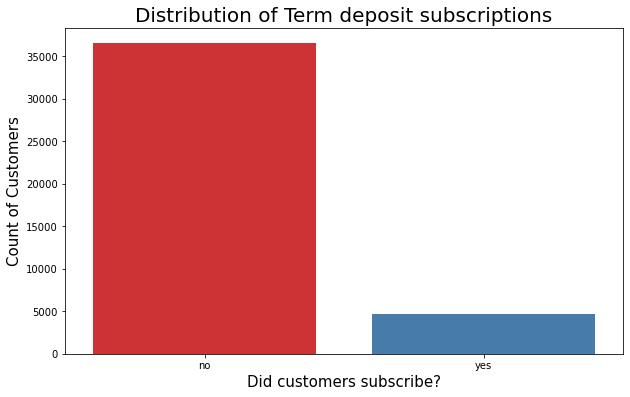

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "y", data = df, palette = "Set1")
plt.title("Distribution of Term deposit subscriptions", fontsize=20)
plt.ylabel('Count of Customers', fontsize=15)
plt.xlabel('Did customers subscribe?', fontsize=15)
plt.show()

# df['y'].value_counts().plot.bar()
# plt.title('Distribution of Term deposit subscription', fontsize=16)
# plt.show()

In [20]:
df['y'].value_counts()/len(df.y)*100

no     88.733728
yes    11.266272
Name: y, dtype: float64

### Inference:
As we can see here, 88.73% of the observations are belonging to "No" and
11% to "Yes" class. This counts to class imbalance dataset, and this needs to be delt while modeling. 


## Data pre-processing

Missing values and duplicate columns are already removed. Moving on with removing unused columns, encoding categorical features into numericals, feature scaling the numerical features
### Dropping the unused columns:
#### 1. Duration
As suggested in the document, this feature includes too manu outliers, plus is highly fluential on the dependent feature. Also, the value of this variable will only be known at the end of the call and at that point of time, we will anyway know the result of the call too. 

#### 2. ModelPrediction
Contains the result of the current default model, and can not be considered as a feature. We need to store this in a variable for evaluating the current model

In [21]:
#Storing the ModelPrediction
CurrModelProb = df['ModelPrediction']
print("Shape of features dataset: ", df.shape)
print("Shape of model predictions: ", CurrModelProb.shape)

Shape of features dataset:  (41176, 22)
Shape of model predictions:  (41176,)


## Removing the following columns: ModelPrediction and Duration

In [22]:
df.drop('ModelPrediction', axis = 1, inplace = True)

In [23]:
df.drop('duration', axis = 1, inplace = True)
df.shape

(41176, 20)

### Inference: 
1) Initial data of 41188 rows is reduced to 41176 (12 duplicated rows)<br>
2) Features reduced to 20 from 22

## Explore the Correlation between numerical features

<AxesSubplot:>

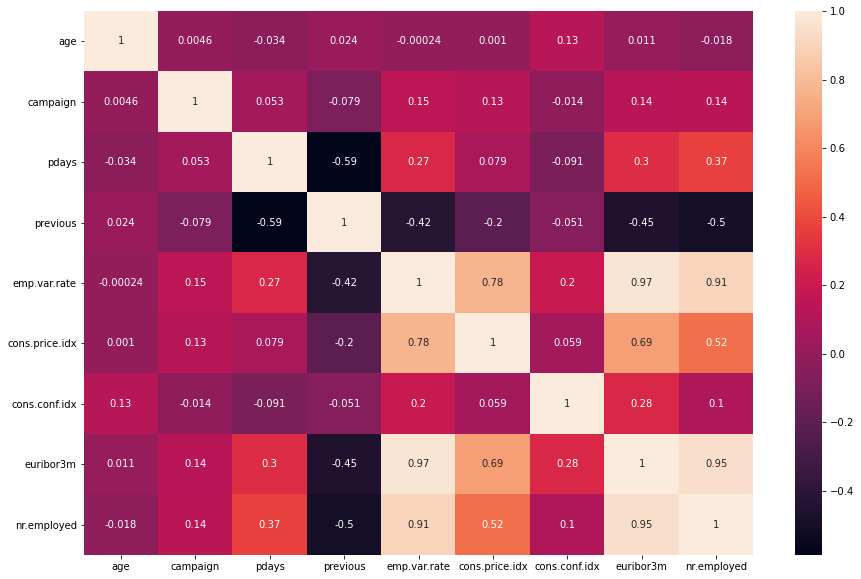

In [24]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(cor_mat,annot=True)

### Inference: 
1) emp.var.rate, euribor3m and nr.employed are correlated<br>
* emp.var.rate: Employment variation rate - quarterly indicator
* nr.employed: Number of employees - quarterly indicator
* euribor3m: Eurobir 3 months rate - the rate for deposits in euros for a period of the 3 months, expressed as a percentage, daily indicator. It is the basic rate of interest used in lending between banks on the European Union interbank market and also used as a reference for setting the interest rate on other loans.




## Encoding the Dependent variable

In [25]:
# creating instance of labelencoder
labelencoder = preprocessing.LabelEncoder()
# Assigning numerical values and storing in another variable called target
df['y'] = labelencoder.fit_transform(df['y'])
target = df['y']

Dropping the target variable:y from the dataset, to keep it seperate from independent variables

In [26]:
df.drop('y', axis = 1, inplace = True)

In [27]:
df.shape
#Features reduced to 19 from 20

(41176, 19)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

### Inference: 
1) Features with Datatype object, categorical variables need to be converted into several binary columns, where 1 indicates the presence of that category. 

In [29]:
# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [30]:
converted_df = pd.get_dummies(df, columns = categorical_features, drop_first = True)

In [31]:
#converted_df.head()

In [32]:
converted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   campaign                       41176 non-null  int64  
 2   pdays                          41176 non-null  int64  
 3   previous                       41176 non-null  int64  
 4   emp.var.rate                   41176 non-null  float64
 5   cons.price.idx                 41176 non-null  float64
 6   cons.conf.idx                  41176 non-null  float64
 7   euribor3m                      41176 non-null  float64
 8   nr.employed                    41176 non-null  float64
 9   job_blue-collar                41176 non-null  uint8  
 10  job_entrepreneur               41176 non-null  uint8  
 11  job_housemaid                  41176 non-null  uint8  
 12  job_management                 41176 non-null 

## Scaling the Numerical Features:

Feature scaling is usually done to prevent one feature to dominate the other. If scaling is not done, then machine learning algorithm tends to weigh greater values higher and consider smaller values as the lower values, regardless of the unit of the values. 

In [33]:
# Numerical features
numerical_columns = converted_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

Not Performing scaling on dummy variables here. 

In [34]:
# Scaling numerical columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(converted_df[numerical_columns])
converted_df[numerical_columns] = pd.DataFrame(scaled_df, columns = numerical_columns)
converted_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533143,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
1,1.629107,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.290177,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.002284,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0
4,1.533143,-0.565963,0.195443,-0.349551,0.648101,0.722628,0.886568,0.712463,0.331695,0,...,1,0,0,0,1,0,0,0,1,0


In [35]:
target.shape

(41176,)

Storing the transformed dataset with dependent and independent information as csv files:

In [36]:
converted_df.to_csv(r'Input_Features.csv', index = False)
target.to_csv(r'Target_Feature.csv', index = False)

## Evaluating the Default Model

The given data set includes variable called ModelPerformance, which includes the results from a current model that is used to predict whether a client will subscribe or not to the term deposit. 
ModelPerformance = probability of subscribing to term deposit.

Since the prediction output(1/0) is not given, let us define a threshold probabilty of 0.5 (standard threshold when not given, could be higher depending on the domain knowledge) with which we can predict if the given propbabilty maps to 1(presence) or 0(absence). That is if the given probability is greater than our defined threshold probabilty, then the target variable is 1, otherwise 0.

Our target variable is suffering from class imbalance dataset problem, with 88.73% of the observations belonging to "No" and
11% to "Yes" class. In such cases, Classification Accuracy, ratio of number of correct predictions to the total number of input samples provides us the biased accurate metrics. Hence, Logarithmic Loss or Log Loss, works better by penalizing the false classifications. When working with Log Loss, the classifier must assign probability to each class for all the samples. 


### Some of the metrics that are used for evaluating classification model

1. **Accuracy:** It is the number of correct predictions made divided by the total number of predictions made, multiplied by 100 to turn it into a percentage.
2. **Recall/Sensitivity:** TruePositive / (TruePositive + FalseNegative)
3. **Precision:** TruePositive / (TruePositive + FalsePositive)
4. **F-Measure** = (2 * Precision * Recall) / (Precision + Recall)
5. **F1-Score:** Ranges between 0.01 to 1, this metric is the harmonic mean of precision and recall. ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
6. **TruePositiveRate** = TruePositive / (TruePositive + FalseNegative)
7. **FalsePositiveRate** = FalsePositive / (FalsePositive + TrueNegative)
8. **ROC Curve:** ROC Area Under Curve, measures TPR against FPR. The more the area under the curve, the better the model.
9. **Log-Loss:** It measures uncertainity in the model. low Log Loss means a low uncertainty/entropy of your mode, better te model.

## Generating predictions from probabilities

In [37]:
threshold = 0.50
CurrModel_pred = np.where(CurrModelProb >= threshold, 1, 0)

CurrModel_pred.shape

(41176,)

### Function to generate model report

In [38]:
def model_eval(tn, fp, fn, tp, target, predictions, prob):
    print("Accuracy = " , round(accuracy_score(target, predictions), 3))
    print("Precision = " ,round(precision_score(target, predictions), 3))
    print("Recall = " ,round(recall_score(target, predictions), 2))
    print("F1 Score = " ,round(f1_score(target, predictions), 2))
    print("false_positive_rate = " , round(fp / (fp + tn), 3))
    print("false_negative_rate = " ,round(fn / (tp + fn),2))
    print("lg_loss = " , round(log_loss(target, prob), 2))
    print("ROC = ", round(roc_auc_score(target, prob),3))

### Function to generate confusion matrix
Confusion_matrix(y_true,y_pred)<br>
y_true here is the actual/true value of the target feature. I have stored it in target. "target" = df['y]

y_pred is the prediction value of the target feature, for the default model it is given in the dataset as ModelPrediction feature. I have stored it in "CurrModelProb". With a default threshold of 0.5, I have calculated the prediction of this field and stored it as "CurrModel_pred"


In [39]:
matrix = confusion_matrix(target,CurrModel_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)


Confusion matrix : 
 [[ 3959   680]
 [36281   256]]


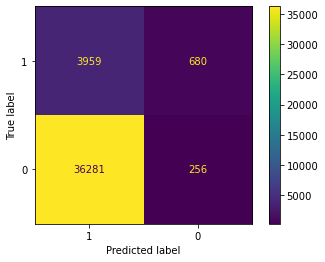

In [40]:
cmd = ConfusionMatrixDisplay(matrix, display_labels=[1,0])
cmd.plot()
#plt.savefig('cm.png', dpi=300, bbox_inches='tight')

In [41]:
tn, fp, fn, tp = confusion_matrix(target,CurrModel_pred).ravel() #change a 2-dimensional array to a flattened array
model_eval(tn, fp, fn, tp, target, CurrModel_pred, CurrModelProb)

Accuracy =  0.102
Precision =  0.098
Recall =  0.85
F1 Score =  0.18
false_positive_rate =  0.993
false_negative_rate =  0.15
lg_loss =  2.44
ROC =  0.235


In [42]:
print("TN = ", tn)
print("FP = ", fp)
print("FN = ", fn)
print("TP = ", tp)

TN =  256
FP =  36281
FN =  680
TP =  3959


### Inference

1. **Accuracy:** As stated earlier, accuracy is not a good measure to evaluate imbalanced classification model. Our Accuracy is very low at 10.2 %. 

2. **Recall:** Recall refers to how many of the correct hits were also found, here we can see that 85% of the customers were correctly identified that they had enrolled to the term deposit.
   
   
3. **Precision:** The model has a precision of about 10 %. True positive value of 10% of the customers, did subscribe to the term deposit.


4. **F1-Score:** The F-Measure is a popular metric for imbalanced classification, higher the score, better is the model. F1 score conveys the balance between the precision and the recall. 


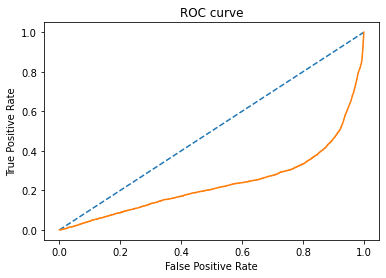

In [43]:
# Getting the ROC plot
# labels - target
# probs - CurrModelProb
fpr, tpr, thresholds = roc_curve(target, CurrModelProb)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve")
plt.savefig('roc.png', dpi=300, bbox_inches='tight')
plt.show()